In [1]:
Pracownicy = 3

In [2]:
from itertools import product

In [3]:
def Oszacowanie(scenariusz,pracownicy):
    return sum(scenariusz)/pracownicy

In [4]:
def scenariusze_dla_decyzji(decyzja,pracownicy):
    scenariusze=[]
    for i in range (pracownicy):
        scenariusz=[]
        for j in range (len(decyzja)):
            if decyzja[j]==i:
                scenariusz.append(Zadania[j][1])
            else:
                scenariusz.append(Zadania[j][0])
        scenariusze.append(scenariusz)
    return scenariusze

In [5]:
def wynik_prac_dec_scen(scenariusz,decyzja,pracownicy):
    wynik=0
    for i in range (pracownicy):
        curr=0
        for j in range (len(scenariusz)):
            if decyzja[j]==i:
                curr += scenariusz[j]
        if curr>wynik:
            wynik=curr
    return wynik

In [6]:
def wynik_prac_dec(decyzja, pracownicy):
    wynik=0
    scenariusze=scenariusze_dla_decyzji(decyzja,pracownicy)
    for i in range (len(scenariusze)):
        curr = wynik_prac_dec_scen(scenariusze[i],decyzja,pracownicy) - Oszacowanie(scenariusze[i],pracownicy)
        if curr>wynik:
            wynik=curr
            sc=scenariusze[i]
    return wynik,sc

In [7]:
import math
def wyniki_dla_zadanych_decyzji(decyzje, pracownicy):
    wynik=math.inf
    for i in range (len(decyzje)):
        curr,a=wynik_prac_dec(decyzje[i], pracownicy)
        if curr<wynik:
            wynik=curr
            najlepsza=decyzje[i]
    return wynik,najlepsza

In [8]:
import numpy as np
import random
import math

In [9]:
def next_pracownik(decyzja_index,pracownicy):
    wynik =[]
    p=[]
    for i in range(pracownicy):
        curr=0
        for j in range(len(decyzja_index)):
            if decyzja_index[j][2]==i:
                curr += decyzja_index[j][0]
        p.append(curr)
    wynik.append(np.argmin(p))
    return wynik

In [10]:
def greedy(scenariusz, pracownicy):
    decyzja_index = []
    
    li=[]                                  #[[dlugosc zadania,index zadania],[],[]]
    for i in range(len(scenariusz)):
          li.append([scenariusz[i],i])
    li.sort()
    for i in range(len(scenariusz)):
        if decyzja_index == []:
            decyzja_index.append(li[i]+[0])
        else:
            decyzja_index.append(li[i]+next_pracownik(decyzja_index,pracownicy))
    #print(decyzja_index)
    decyzja=[]
    decyzja_index=np.array(decyzja_index)[np.array(decyzja_index)[:, 1].argsort()]
    for i in range(len(decyzja_index)):
        decyzja.append(decyzja_index[i][2])
    return decyzja

In [11]:
def seed_generation(scenariusz, pracownicy, decyzja):          #uzywany w wyzarzaniu
    
    PMS = 9999999999                                  #previous makespan
    MS = 0
    while MS<PMS:
        #znalezc pracownika gdzie czas pracy jest najdluzszy
        p=[]
        for i in range(pracownicy):
            curr=0
            for j in range(len(decyzja)):
                if decyzja[j]==i:
                    curr += scenariusz[j]
            p.append(curr)
        R = np.argmin(p)                                  #R - pracownik ktory najdluzej robi
        
        MS = wynik_prac_dec_scen(scenariusz,decyzja,pracownicy)
        PMS = MS
        
        
        #lista zadan w R
        lzwR = []
        for i in range(len(decyzja)):
            if decyzja[i] == R:
                lzwR.append(i)
                
        #zamieniamy zadania
        for i in range(len(decyzja)):
            d_temp = decyzja
            if decyzja[i] != R:
                for j in lzwR:
                    d_temp[i],d_temp[j] = d_temp[j],d_temp[i] 
                    new_MS = wynik_prac_dec_scen(scenariusz,d_temp,pracownicy)
                    if new_MS < MS:
                        decyzja = d_temp
                        MS = new_MS
                        
        
    return decyzja

In [12]:
def annealing(scenariusz, pracownicy, T=60, r=0.85, delta=0.01):
    S0 =seed_generation(scenariusz, pracownicy,greedy(scenariusz, pracownicy))
    while T > delta:
        p_list=[]
        for i in range(pracownicy):
            p_list.append(i)

        #generate S1
        R = np.random.uniform(0, 0.99)
        if R<=0.49:#zamiana
            p1,p2 = 0,0
            z1,z2 = [],[]
            p1 = random.choice(p_list) #losowy pracownik
            p_list.remove(p1)
            p2 = random.choice(p_list) #drugi losowy pracownik(inny)

            for i in range(len(S0)):
                if i == p1:
                    z1.append(i)
                if i == p2:
                    z2.append(i)

            zad_a,zad_b = random.choice(z1),random.choice(z2) #losowe zadania ktore sa wykonywane przez wylosowanych pracowników
            S1 = S0
            S1[zad_a],S1[zad_b] = S1[zad_b],S1[zad_a]         #zamiana tych zadan

        else:#transfer
            p1 = 0
            z1 = []
            p1 = random.choice(p_list) #losowy pracownik
            p_list.remove(p1)
            p = random.choice(p_list)
            for i in range(len(S0)):
                if i == p1:
                    z1.append(i)
            zad = random.choice(z1)    #losowe zadanie
            S1 = S0
            
            S1[zad]= S1[p] #transfer wylosowanego zadania do innego pracownika


        d = wynik_prac_dec_scen(scenariusz,S0,pracownicy) - wynik_prac_dec_scen(scenariusz,S1,pracownicy)
        if d>0:
            S0=S1
        else:
            R = np.random.uniform(0, 0.99)
            if R < math.e*(d/T):
                S0=S1
        T = r*T
    final_local_optimum = seed_generation(scenariusz, pracownicy, S0)
    return final_local_optimum

In [13]:
#DLA 10 i 100 ZADAŃ

In [14]:
def gen_zad(lower, higher, n):
    zadania = []
    for i in range(n):
        low = random.randint(lower,higher)
        high = random.randint(low,higher)
        zadania.append([low,high])
    return zadania

In [15]:
zad10 = gen_zad(1,10,10)
zad50 = gen_zad(1,10,50)

In [16]:
print(zad10)
#print(zad50)

[[1, 2], [3, 6], [1, 5], [4, 9], [8, 10], [10, 10], [7, 7], [5, 10], [1, 7], [5, 6]]


In [17]:
#10 zadan

In [18]:
Scenariusz_min = []
Scenariusz_max = []
Scenariusz_avg = []

for i in range (len(zad10)):
        Scenariusz_min.append(zad10[i][0])
        Scenariusz_max.append(zad10[i][1])
        Scenariusz_avg.append((zad10[i][0] + zad10[i][1])/2)

In [19]:
Zadania = zad10

In [20]:
Scenariusze_minmaxavg = [Scenariusz_min, Scenariusz_max, Scenariusz_avg]

In [21]:
min_greedy,max_greedy,avg_greedy,min_seed,max_seed,avg_seed,min_ann,max_ann,avg_ann = greedy(Scenariusz_min,Pracownicy),greedy(Scenariusz_max,Pracownicy),greedy(Scenariusz_avg,Pracownicy),seed_generation(Scenariusz_min,Pracownicy,greedy(Scenariusz_min,Pracownicy)),seed_generation(Scenariusz_max,Pracownicy,greedy(Scenariusz_max,Pracownicy)),seed_generation(Scenariusz_avg,Pracownicy,greedy(Scenariusz_avg,Pracownicy)),annealing(Scenariusz_min,Pracownicy),annealing(Scenariusz_max,Pracownicy),annealing(Scenariusz_avg,Pracownicy),


In [22]:
print(wyniki_dla_zadanych_decyzji([min_greedy,max_greedy,avg_greedy,min_seed,max_seed,avg_seed,min_ann,max_ann,avg_ann],Pracownicy))

(7.666666666666668, [0, 0, 1, 1, 2, 0, 1, 2, 2, 0])


In [23]:
Z_min_greedy,Z_max_greedy,Z_avg_greedy,Z_min_seed,Z_max_seed,Z_avg_seed,Z_min_ann,Z_max_ann,Z_avg_ann = wynik_prac_dec(min_greedy,Pracownicy),wynik_prac_dec(max_greedy,Pracownicy),wynik_prac_dec(avg_greedy,Pracownicy),wynik_prac_dec(min_seed,Pracownicy),wynik_prac_dec(max_seed,Pracownicy),wynik_prac_dec(avg_seed,Pracownicy),wynik_prac_dec(min_ann,Pracownicy),wynik_prac_dec(max_ann,Pracownicy),wynik_prac_dec(avg_ann,Pracownicy)

In [24]:
Z_list = [Z_min_greedy,Z_max_greedy,Z_avg_greedy,Z_min_seed,Z_max_seed,Z_avg_seed,Z_min_ann,Z_max_ann,Z_avg_ann]
for i in range(len(Z_list)):
    print(Z_list[i])
#To ci wyliczy ŻALE

(7.666666666666668, [1, 3, 1, 4, 10, 10, 7, 10, 7, 5])
(8.0, [2, 3, 1, 9, 8, 10, 7, 10, 1, 6])
(8.666666666666668, [2, 6, 1, 4, 8, 10, 7, 5, 1, 5])
(15.333333333333332, [1, 3, 5, 9, 10, 10, 7, 5, 1, 5])
(10.0, [1, 3, 1, 4, 10, 10, 7, 5, 1, 6])
(12.333333333333332, [1, 3, 1, 9, 10, 10, 7, 5, 7, 6])
(20.333333333333332, [1, 3, 5, 9, 10, 10, 7, 5, 7, 5])
(16.333333333333332, [1, 3, 1, 4, 10, 10, 7, 5, 7, 5])
(15.333333333333332, [1, 3, 1, 4, 8, 10, 7, 10, 7, 5])


In [25]:
x10 = []
for i in range(len(Z_list)):
    x10.append(Z_list[i][0])
#To ci wyliczy ŻALE

In [26]:
#50 zadan

In [27]:
Scenariusz_min = []
Scenariusz_max = []
Scenariusz_avg = []

for i in range (len(zad50)):
        Scenariusz_min.append(zad50[i][0])
        Scenariusz_max.append(zad50[i][1])
        Scenariusz_avg.append((zad50[i][0] + zad50[i][1])/2)

In [28]:
Zadania = zad50

In [29]:
Scenariusze_minmaxavg = [Scenariusz_min, Scenariusz_max, Scenariusz_avg]

In [30]:
min_greedy,max_greedy,avg_greedy,min_seed,max_seed,avg_seed,min_ann,max_ann,avg_ann = greedy(Scenariusz_min,Pracownicy),greedy(Scenariusz_max,Pracownicy),greedy(Scenariusz_avg,Pracownicy),seed_generation(Scenariusz_min,Pracownicy,greedy(Scenariusz_min,Pracownicy)),seed_generation(Scenariusz_max,Pracownicy,greedy(Scenariusz_max,Pracownicy)),seed_generation(Scenariusz_avg,Pracownicy,greedy(Scenariusz_avg,Pracownicy)),annealing(Scenariusz_min,Pracownicy),annealing(Scenariusz_max,Pracownicy),annealing(Scenariusz_avg,Pracownicy),


In [31]:
print(wyniki_dla_zadanych_decyzji([min_greedy,max_greedy,avg_greedy,min_seed,max_seed,avg_seed,min_ann,max_ann,avg_ann],Pracownicy))

(26.33333333333333, [2.0, 0.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0])


In [32]:
Z_min_greedy,Z_max_greedy,Z_avg_greedy,Z_min_seed,Z_max_seed,Z_avg_seed,Z_min_ann,Z_max_ann,Z_avg_ann = wynik_prac_dec(min_greedy,Pracownicy),wynik_prac_dec(max_greedy,Pracownicy),wynik_prac_dec(avg_greedy,Pracownicy),wynik_prac_dec(min_seed,Pracownicy),wynik_prac_dec(max_seed,Pracownicy),wynik_prac_dec(avg_seed,Pracownicy),wynik_prac_dec(min_ann,Pracownicy),wynik_prac_dec(max_ann,Pracownicy),wynik_prac_dec(avg_ann,Pracownicy)

In [33]:
Z_list = [Z_min_greedy,Z_max_greedy,Z_avg_greedy,Z_min_seed,Z_max_seed,Z_avg_seed,Z_min_ann,Z_max_ann,Z_avg_ann]
for i in range(len(Z_list)):
    print(Z_list[i])
#To ci wyliczy ŻALE

(31.66666666666667, [7, 1, 5, 4, 7, 10, 10, 8, 8, 10, 5, 10, 7, 10, 10, 3, 5, 6, 2, 6, 8, 6, 4, 8, 10, 5, 10, 9, 3, 2, 8, 5, 10, 3, 5, 7, 1, 6, 8, 1, 10, 6, 9, 8, 8, 7, 3, 10, 9, 5])
(28.66666666666667, [7, 1, 5, 4, 7, 10, 10, 8, 8, 10, 5, 10, 2, 3, 10, 9, 6, 6, 2, 4, 8, 5, 6, 8, 8, 5, 10, 9, 1, 2, 9, 5, 5, 3, 5, 8, 1, 6, 6, 2, 10, 6, 9, 8, 3, 8, 9, 9, 10, 5])
(26.33333333333333, [7, 1, 5, 4, 6, 10, 10, 8, 8, 5, 5, 10, 2, 3, 10, 9, 5, 6, 8, 4, 8, 6, 4, 8, 8, 5, 9, 9, 1, 8, 8, 5, 5, 3, 8, 7, 1, 6, 8, 2, 10, 6, 9, 9, 3, 8, 9, 10, 9, 5])
(26.66666666666667, [9, 2, 7, 4, 7, 10, 10, 8, 8, 10, 6, 10, 7, 10, 10, 9, 6, 6, 2, 4, 8, 5, 4, 7, 8, 5, 9, 9, 1, 2, 8, 5, 5, 3, 5, 7, 1, 6, 6, 1, 10, 6, 9, 8, 3, 7, 3, 9, 9, 5])
(29.0, [7, 1, 5, 4, 6, 10, 10, 8, 8, 5, 5, 10, 7, 3, 10, 3, 5, 9, 2, 4, 8, 5, 6, 7, 8, 5, 9, 9, 3, 2, 9, 9, 10, 3, 5, 7, 1, 10, 6, 2, 10, 6, 10, 9, 8, 7, 9, 10, 10, 5])
(26.66666666666667, [9, 2, 7, 4, 7, 10, 10, 8, 8, 10, 6, 10, 7, 10, 10, 9, 6, 6, 2, 4, 8, 5, 4, 7, 8, 5, 9, 9, 

In [34]:
x50 = []
for i in range(len(Z_list)):
    x50.append(Z_list[i][0])
#To ci wyliczy ŻALE

In [35]:
print(x10)

[7.666666666666668, 8.0, 8.666666666666668, 15.333333333333332, 10.0, 12.333333333333332, 20.333333333333332, 16.333333333333332, 15.333333333333332]


In [36]:
print(x50)

[31.66666666666667, 28.66666666666667, 26.33333333333333, 26.66666666666667, 29.0, 26.66666666666667, 27.0, 29.66666666666667, 26.66666666666667]


In [37]:
import matplotlib.pyplot as plt

In [39]:
columns = ("min_greedy","max_greedy","avg_greedy","min_seed","max_seed","avg_seed","min_ann","max_ann","avg_ann")

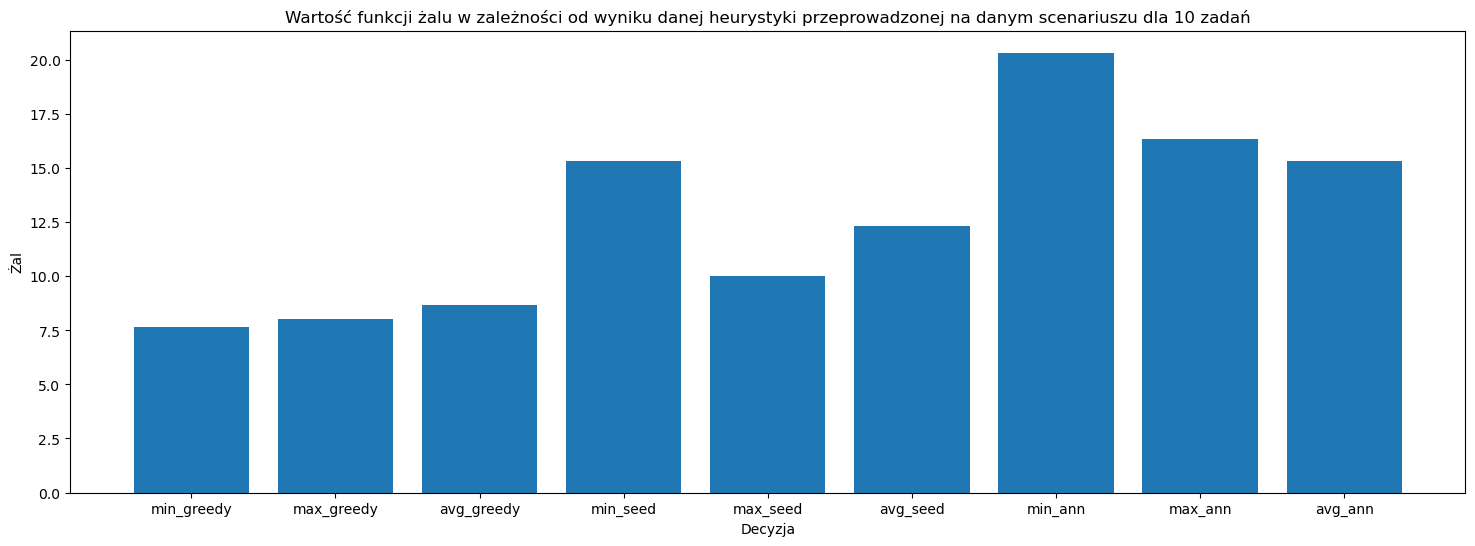

In [49]:
plt.figure(figsize=(18,6))
plt.bar(columns, x10)
plt.xlabel("Decyzja")
plt.ylabel("Żal")
plt.title("Wartość funkcji żalu w zależności od wyniku danej heurystyki przeprowadzonej na danym scenariuszu dla 10 zadań")
plt.show()

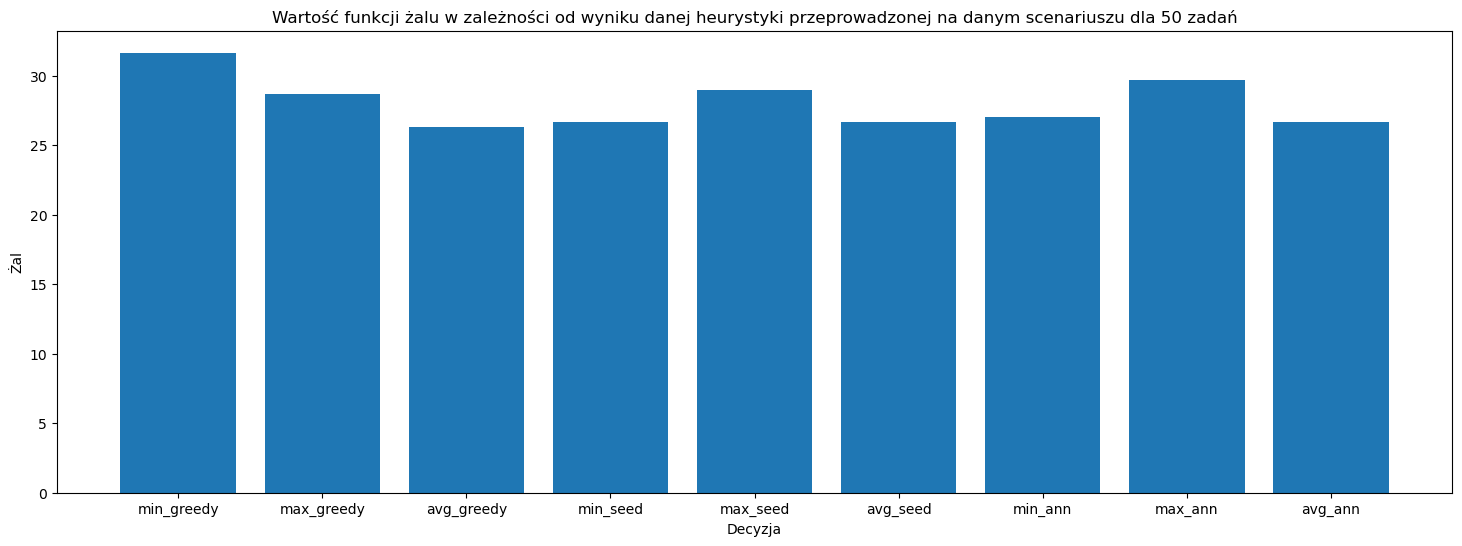

In [48]:
plt.figure(figsize=(18,6))
plt.bar(columns, x50)
plt.xlabel("Decyzja")
plt.ylabel("Żal")
plt.title("Wartość funkcji żalu w zależności od wyniku danej heurystyki przeprowadzonej na danym scenariuszu dla 50 zadań")
plt.show()